In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

In [2]:
data_dir = "data"

In [3]:
Z0 = np.load(f"{data_dir}/Z0.npy")
Y0 = np.load(f"{data_dir}/Y0.npy")

In [4]:
est_A = np.load(f"{data_dir}/est_A0.npy")
est_b = np.load(f"{data_dir}/est_b0.npy")
est_Z = np.load(f"{data_dir}/est_Z0.npy")

In [5]:
def calc_grad(with_prior=True):
    P_cm = expit(Z0 @ est_A.T + est_b)
    
    if with_prior:
        return (Y0 - P_cm) @ est_A - Z0
    else:
        return (Y0 - P_cm) @ est_A

In [6]:
Grad = calc_grad()

Text(-13, 1.1, 'Corr=0.889')

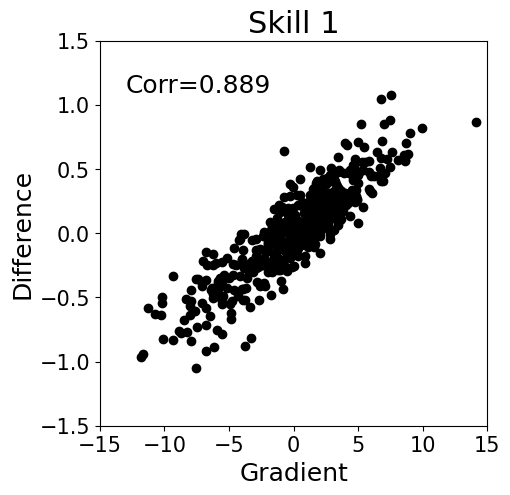

In [7]:
c = "black"
plt.figure(figsize=(5,5))
corr = np.corrcoef(Grad[:, 0], est_Z[:, 0] - Z0[:, 0])[0,1]
nsample_for_vis = 500
plt.scatter(Grad[:nsample_for_vis, 0], est_Z[:nsample_for_vis, 0] - Z0[:nsample_for_vis, 0], color=c)
plt.xlim(-15, 15)
plt.ylim(-1.5, 1.5)
plt.xlabel("Gradient", fontsize=18)
plt.ylabel("Difference", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Skill 1", fontsize=22)
plt.text(-13, 1.1, f"Corr={corr:0.3f}", fontsize=18)

Text(-13, 1.1, 'Corr=0.901')

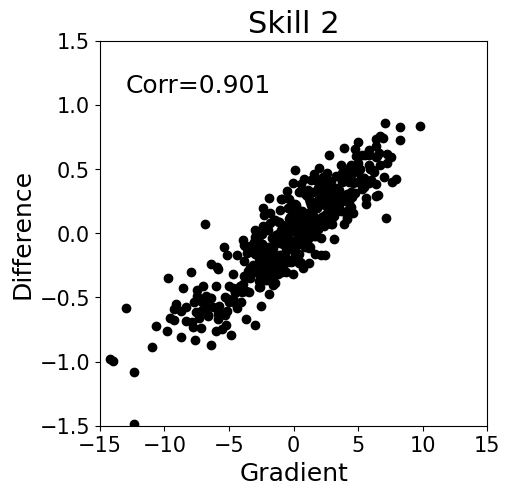

In [8]:
c = "black"
plt.figure(figsize=(5,5))
corr = np.corrcoef(Grad[:,1], est_Z[:, 1] - Z0[:, 1])[0,1]
nsample_for_vis = 500
plt.scatter(Grad[:nsample_for_vis, 1], est_Z[:nsample_for_vis, 1] - Z0[:nsample_for_vis, 1], color=c)
plt.xlim(-15, 15)
plt.ylim(-1.5, 1.5)
plt.xlabel("Gradient", fontsize=18)
plt.ylabel("Difference", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Skill 2", fontsize=22)
plt.text(-13, 1.1, f"Corr={corr:0.3f}", fontsize=18)